In [73]:
import pandas as pd
pd.set_option("display.max_columns", None)
train = pd.read_csv("../data/raw/train.csv")

In [74]:
train.shape 

(16209, 21)

In [75]:
train["price"].describe()

count    1.620900e+04
mean     5.374703e+05
std      3.603036e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

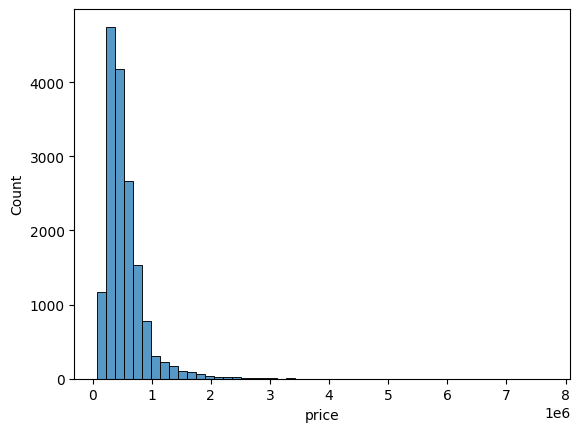

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.histplot(train["price"], bins=50)
plt.show()

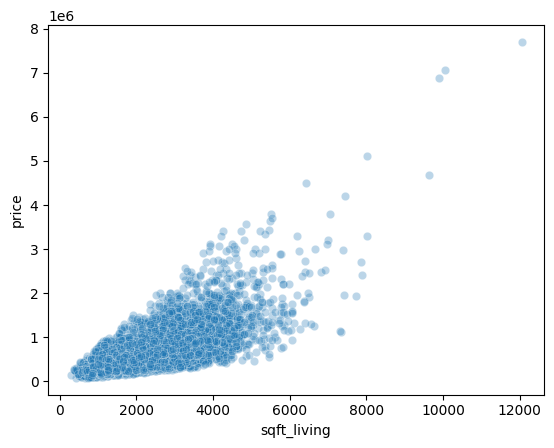

In [77]:
sns.scatterplot(
    x=train["sqft_living"],
    y=train["price"],
    alpha=0.3
)
plt.show()


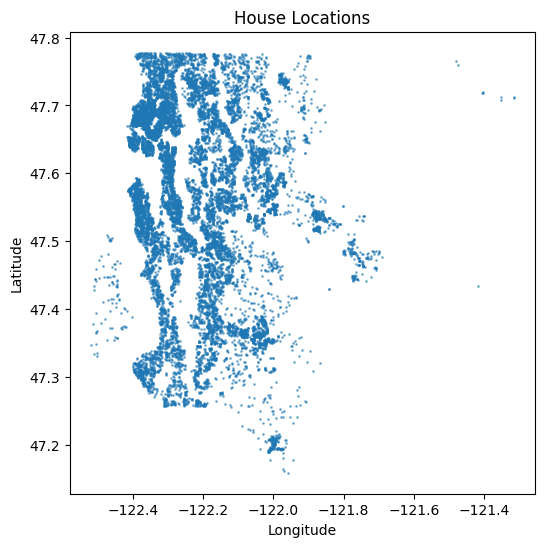

In [78]:
plt.figure(figsize=(6,6))
plt.scatter(
    train["long"],
    train["lat"],
    s=1,
    alpha=0.5
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Locations")
plt.show()


In [79]:
train.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [80]:
important_cols = [
    "price",
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "lat",
    "long"
]

train[important_cols].head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,lat,long
0,268643,4,2.25,1810,9240,2.0,0,0,3,7,47.4362,-122.187
1,245000,3,2.50,1600,2788,2.0,0,0,4,7,47.4034,-122.187
2,200000,4,2.50,1720,8638,2.0,0,0,3,8,47.2704,-122.313
3,352499,2,2.25,1240,705,2.0,0,0,3,7,47.5321,-122.073
4,232000,3,2.00,1280,13356,1.0,0,0,3,7,47.3715,-122.074


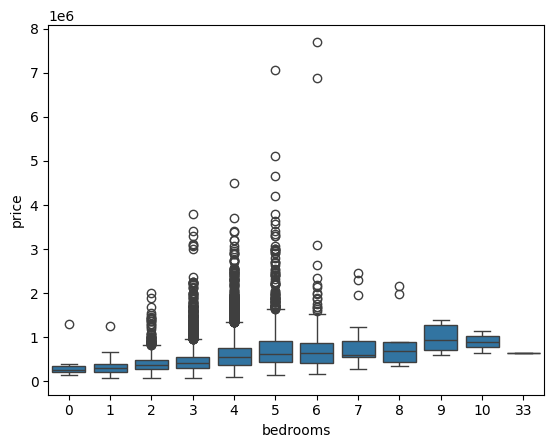

In [81]:
sns.boxplot(x="bedrooms", y="price", data=train)
plt.show()


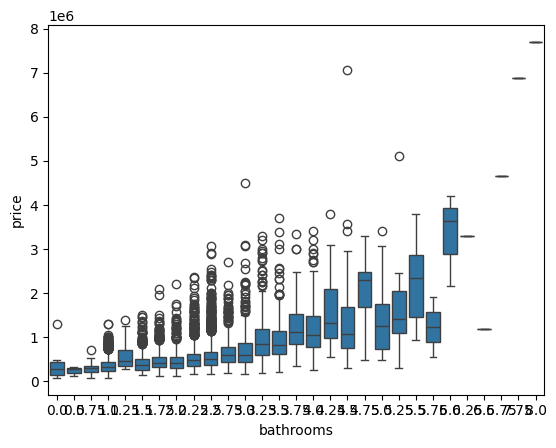

In [82]:
sns.boxplot(x="bathrooms", y="price", data=train)
plt.show()


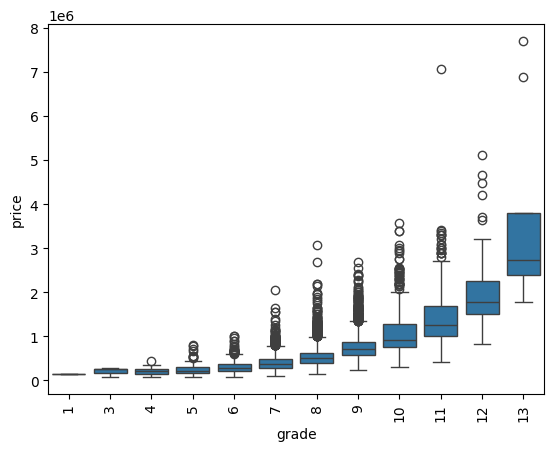

In [83]:
sns.boxplot(x="grade", y="price", data=train)
plt.xticks(rotation=90)
plt.show()


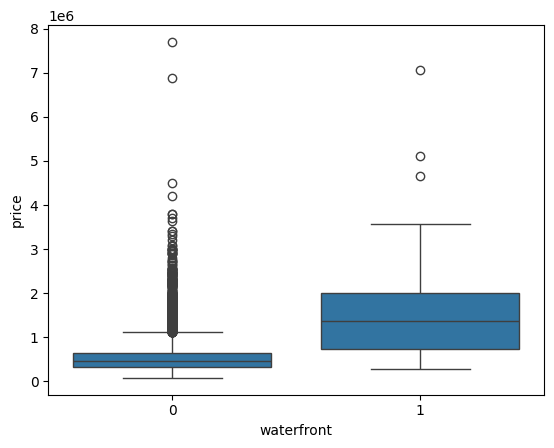

In [84]:
sns.boxplot(x="waterfront", y="price", data=train)
plt.show()


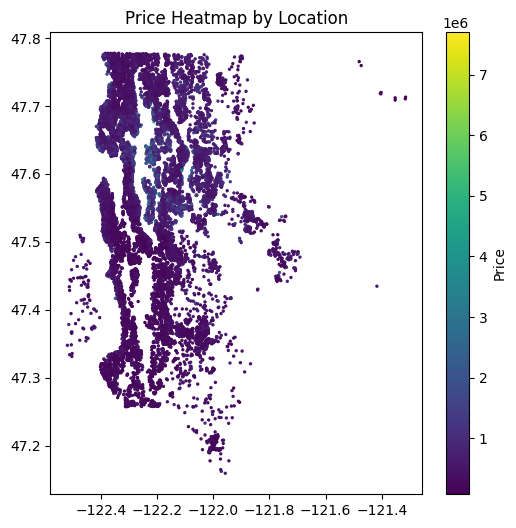

In [85]:
plt.figure(figsize=(6,6))
plt.scatter(
    train["long"],
    train["lat"],
    c=train["price"],
    cmap="viridis",
    s=2
)
plt.colorbar(label="Price")
plt.title("Price Heatmap by Location")
plt.show()


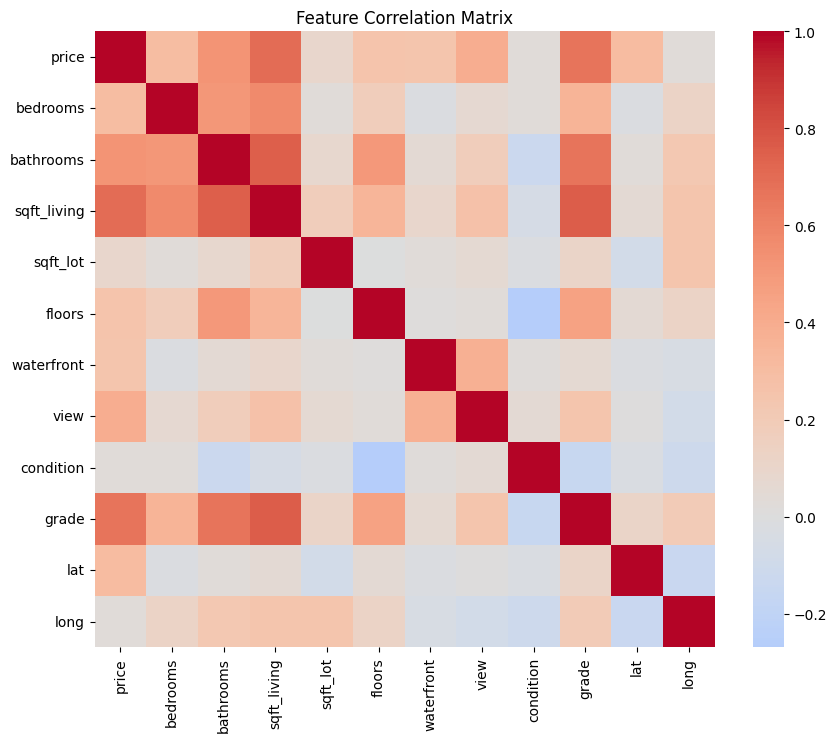

In [86]:
corr = train[important_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()


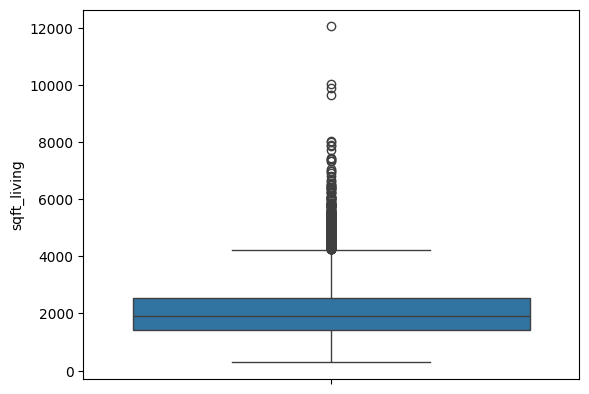

In [87]:
sns.boxplot(train["sqft_living"])
plt.show()


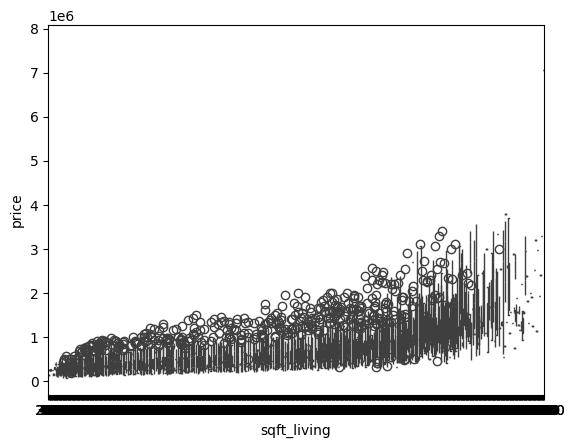

In [88]:
sns.boxplot( x="sqft_living", y = "price" , data = train)
plt.show ()

In [89]:
train["price_per_sqft"] = train["price"] / train["sqft_living"]
train["price_per_sqft"].describe()


count    16209.000000
mean       264.060696
std        109.941354
min         87.647059
25%        182.291667
50%        244.791667
75%        318.085106
max        810.138889
Name: price_per_sqft, dtype: float64

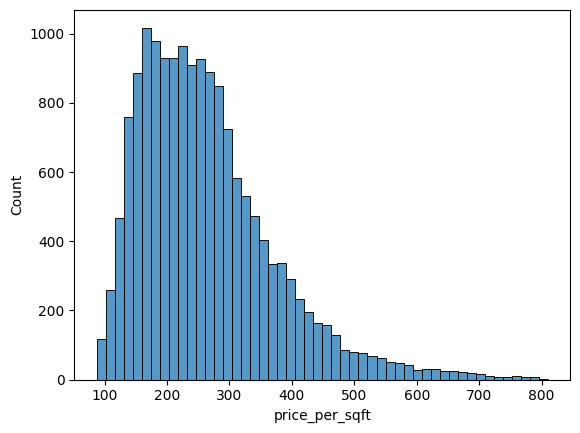

In [90]:
sns.histplot(train["price_per_sqft"], bins=50)
plt.show()


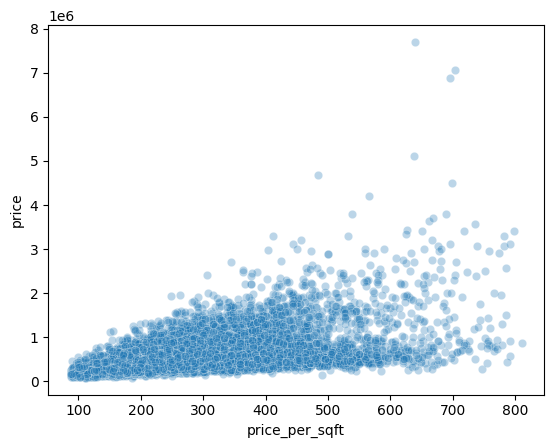

In [91]:
sns.scatterplot(
    x=train["price_per_sqft"],
    y=train["price"],
    alpha=0.3
)
plt.show()


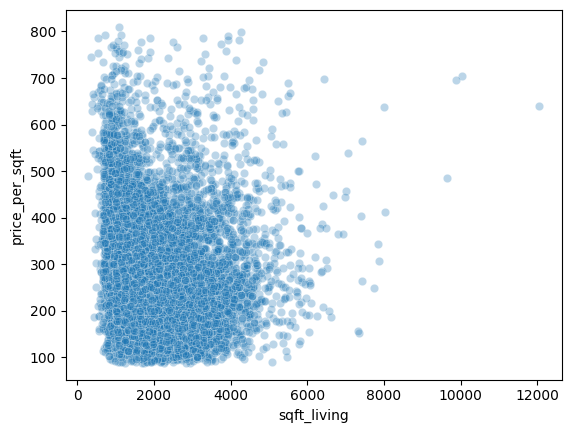

In [92]:
sns.scatterplot(
    x=train["sqft_living"],
    y=train["price_per_sqft"],
    alpha=0.3
)
plt.show()


In [93]:
train["lat_bin"] = train["lat"].round(2)
train["long_bin"] = train["long"].round(2)

neighborhood_price = (
    train.groupby(["lat_bin", "long_bin"])["price"].mean().reset_index()
)


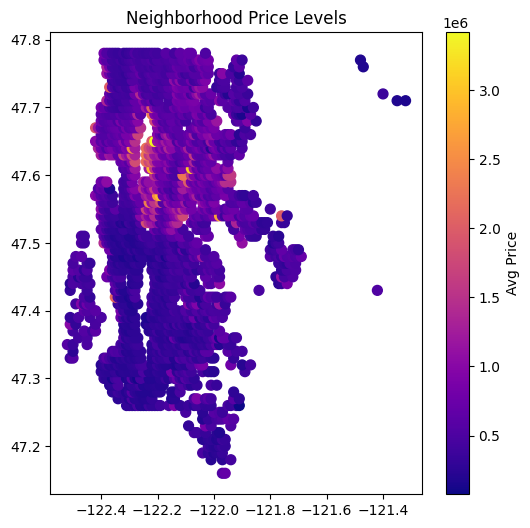

In [94]:
plt.figure(figsize=(6,6))
plt.scatter(
    neighborhood_price["long_bin"],
    neighborhood_price["lat_bin"],
    c=neighborhood_price["price"],
    cmap="plasma",
    s=50
)
plt.colorbar(label="Avg Price")
plt.title("Neighborhood Price Levels")
plt.show()


In [95]:
pivot = train.pivot_table(
    values="price",
    index="grade",
    columns="waterfront",
    aggfunc="mean"
)

pivot


waterfront,0,1
grade,,
1,1.420000e+05,NaN
3,2.056667e+05,NaN
4,2.181271e+05,NaN
5,2.487302e+05,4.007250e+05
6,2.991218e+05,5.472592e+05
7,4.021731e+05,8.518824e+05
8,5.350497e+05,1.258369e+06
9,7.671810e+05,1.599922e+06
10,1.039416e+06,2.289667e+06


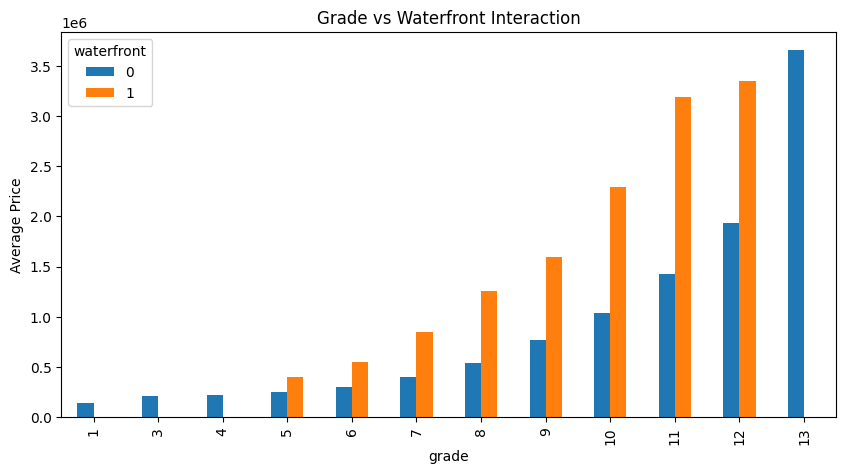

In [96]:
pivot.plot(kind="bar", figsize=(10,5))
plt.ylabel("Average Price")
plt.title("Grade vs Waterfront Interaction")
plt.show()


In [97]:
df = train.copy()

In [98]:
import numpy as np

df["log_price"] = np.log1p(df["price"])


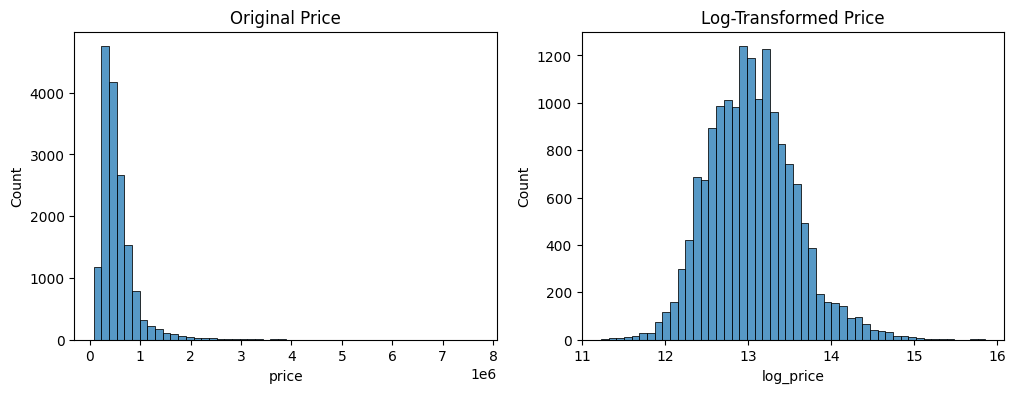

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df["price"], bins=50, ax=axes[0])
axes[0].set_title("Original Price")

sns.histplot(df["log_price"], bins=50, ax=axes[1])
axes[1].set_title("Log-Transformed Price")

plt.show()


<Axes: xlabel='sqft_living', ylabel='Count'>

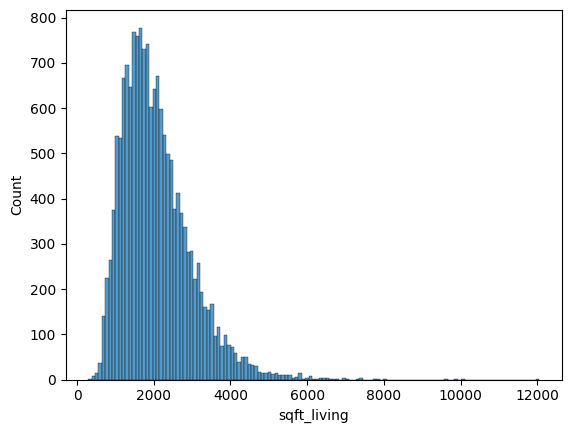

In [100]:
df["sqft_living"].describe()
sns.histplot(df["sqft_living"])

In [101]:
upper = df["sqft_living"].quantile(0.99)
df["sqft_living_capped"] = df["sqft_living"].clip(upper=upper)


<Axes: xlabel='sqft_living_capped', ylabel='Count'>

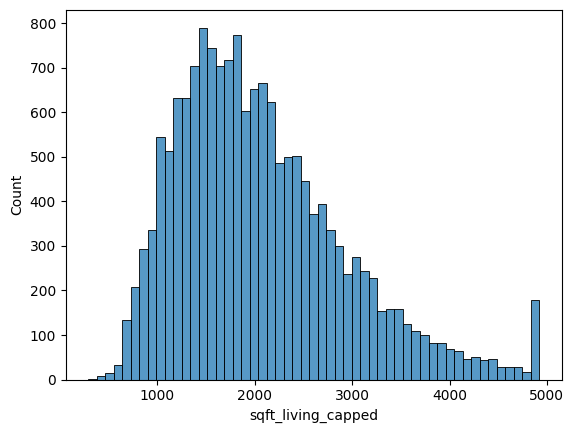

In [102]:
df["sqft_living_capped"].describe()
sns.histplot(df["sqft_living_capped"])

In [103]:
#Feature 2:
df["house_age"] = 2024 - df["yr_built"]
df["recently_renovated"] = (df["yr_renovated"] > 0).astype(int)

In [104]:
#Featre 4:
df["bathroom_per_bedroom"] = df["bathrooms"] / (df["bedrooms"] + 1)

In [105]:
df["lat_round"] = df["lat"].round(3)
df["long_round"] = df["long"].round(3)

In [106]:
features = [
    "bedrooms",
    "bathrooms",
    "sqft_living_capped",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "lat",
    "long",
    "house_age",
    "bathroom_per_bedroom"
]
target = "log_price"


In [107]:
df[features].isnull().sum()


bedrooms                0
bathrooms               0
sqft_living_capped      0
sqft_lot                0
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
lat                     0
long                    0
house_age               0
bathroom_per_bedroom    0
dtype: int64

In [108]:
df[features] = df[features].fillna(df[features].median())


In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df[target].values


In [110]:
processed = pd.DataFrame(X, columns=features)
processed[target] = y
processed.to_csv("../data/processed/train_processed.csv", index=False)


In [111]:
def engineer_features(df):
    df = df.copy()

    # Cap sqft_living
    df["sqft_living_capped"] = df["sqft_living"].clip(upper=5000)

    # House age
    df["house_age"] = 2025 - df["yr_built"]

    # Bathroom per bedroom
    df["bathroom_per_bedroom"] = df["bathrooms"] / (df["bedrooms"] + 1)

    return df


In [112]:
train_df = pd.read_csv("../data/raw/train.csv")
train_df = engineer_features(train_df)
test_df = pd.read_csv("../data/raw/test.csv")
test_df = engineer_features(test_df)


In [113]:
print("Columns in test_df:")
print(test_df.columns.tolist())


Columns in test_df:
['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_living_capped', 'house_age', 'bathroom_per_bedroom']


In [114]:
test_df = pd.read_csv("../data/raw/test.csv")

test_df["sqft_living_capped"] = test_df["sqft_living"].clip(upper=5000)
test_df["house_age"] = 2025 - test_df["yr_built"]
test_df["bathroom_per_bedroom"] = test_df["bathrooms"] / (test_df["bedrooms"] + 1)

print("After engineering:")
print(test_df.columns.tolist())
features = [
    "bedrooms", "bathrooms", "sqft_living_capped", "sqft_lot",
    "floors", "waterfront", "view", "condition", "grade",
    "lat", "long", "house_age", "bathroom_per_bedroom"
]
missing = [f for f in features if f not in test_df.columns]
print("Missing features:", missing)


After engineering:
['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_living_capped', 'house_age', 'bathroom_per_bedroom']
Missing features: []


In [115]:
X_test = test_df[features]
print(X_test.shape)


(5404, 13)


In [116]:
!pip install xgboost


In [118]:
import numpy as np

train_df["log_price"] = np.log1p(train_df["price"])

target = "log_price"
X = train_df[features]
y = train_df[target]
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [119]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [120]:

X_test = test_df[features]
X_test_scaled = scaler.transform(X_test)

test_preds_log = xgb_model.predict(X_test_scaled)
test_preds = np.expm1(test_preds_log)

submission = pd.DataFrame({
    "id": test_df.index,
    "predicted_price": test_preds
})

submission.to_csv("../output/test_predictions.csv", index=False)
